In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
df = pd.read_csv('image_new_240824.csv')

In [3]:
y = df['blank']
X = df.drop(['blank'],axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify=y, random_state = 0)

In [5]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [6]:
cv_params = {'max_depth': [6, 8, 10],
              'min_child_weight': [3, 5, 7],
              'learning_rate': [0.2, 0.3],
              'n_estimators': [30,40],
              'subsample': [0.5,0.7,0.9],
              'colsample_bytree': [0.5,0.7,0.9],
             'gamma': [0, 0.3, 0.4],
             'scale_pos_weight': [1, 2, 4]
              }

scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'accuracy': 'accuracy',
    'f1': 'f1'
}

In [7]:
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [8]:
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 0.9],
                         'gamma': [0, 0.3, 0.4], 'learning_rate': [0.2, 0.3],
                         'max_depth': [6, 8, 10], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [30, 40],
                         'scale_pos_weight': [1, 2, 4],
                         'subsample': [0.5, 0.7, 0.9]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [9]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.3,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 40,
 'scale_pos_weight': 2,
 'subsample': 0.9}

In [10]:
y_pred = xgb_cv.predict(X_test)

In [11]:
ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)
pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)
f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.913718723037101
precision score: 0.8530805687203792
recall score: 0.9045226130653267
f1 score: 0.8780487804878049


In [27]:
pickle.dump(xgb_cv, open('xgb_cv3.sav', 'wb'))

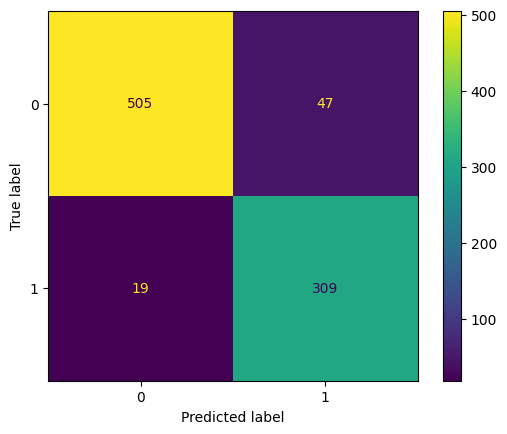

In [24]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

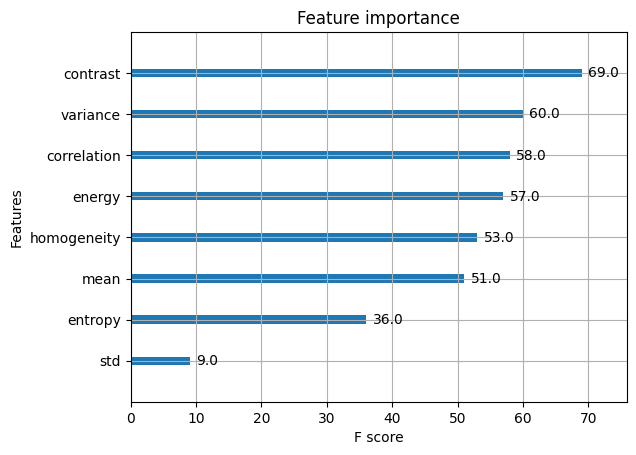

In [25]:
plot_importance(xgb_cv.best_estimator_)